In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import os 
import math
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.data.process_data import *
from src.data.clean_data import *

/Users/ravotyann/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


IMPORTANT: these scripts/functions assume you have the following files in the data/raw directory:
- From the CMU dataset: 
    - movie.metadata.tsv
    - plot_summaries.txt
- From the TMDB dataset: 
    - TMDB_movie_dataset_v11.csv

AND have data/processed folder created

Note: download CMU dataset here: https://www.cs.cmu.edu/~ark/personas/data/MovieSummaries.tar.gz
and TMDB dataset here (Download button): https://www.kaggle.com/datasets/asaniczka/tmdb-movies-dataset-2023-930k-movies

In [2]:
# from raw files, creates clean datafiles
%run src/data/clean_data.py

Loading data:   0%|                                       | 0/1 [00:00<?, ?it/s]

Loading data from data/raw/TMDB_movie_dataset_v11.csv...


Loading data: 100%|███████████████████████████████| 1/1 [00:12<00:00, 12.92s/it]


original df shape (1129691, 24)
after status (1104269, 24)
after adult (999311, 24)
after release date (670140, 24)
after release year (670140, 25)
after runtime (457174, 25)
after duplicates (453441, 25)
after numeric columns (453441, 25)
after string columns (453441, 25)
after production companies (453441, 25)
after select columns (453441, 13)


Loading data:   0%|                                       | 0/1 [00:00<?, ?it/s]

Loading data from data/raw/movie.metadata.tsv...


Loading data: 100%|███████████████████████████████| 1/1 [00:00<00:00,  2.96it/s]


original df shape (81740, 9)
after release year (44006, 9)
after runtime (34490, 9)
after duplicates (34435, 9)
after numeric columns (34435, 9)
after string columns (34435, 9)
after select columns (34435, 5)
Loading data from data/raw/plot_summaries.txt...


In [3]:
# from clean data files, creates a dataframe with CMU + plots & TMDB movies 
df_combined = create_cmu_tmdb_dataset('data/processed/movies.csv','data/processed/plot_summaries.csv', 'data/processed/TMDB_clean.csv', 'inner')

In [4]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17027 entries, 0 to 17026
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   title                 17027 non-null  object
 1   release_year          17027 non-null  int64 
 2   summary               17027 non-null  object
 3   release_date          17027 non-null  object
 4   budget                17027 non-null  int64 
 5   original_language     17027 non-null  object
 6   overview              17027 non-null  object
 7   genres                17027 non-null  object
 8   production_companies  17027 non-null  object
 9   production_countries  17027 non-null  object
 10  spoken_languages      17027 non-null  object
 11  keywords              17027 non-null  object
 12  revenue               17027 non-null  int64 
 13  runtime               17027 non-null  int64 
 14  dvd_era               17027 non-null  object
dtypes: int64(4), object(11)
memory usage

In [5]:
df_combined.head()

,title,release_year,summary,release_date,budget,original_language,overview,genres,production_companies,production_countries,spoken_languages,keywords,revenue,runtime,dvd_era
0,White Of The Eye,1987,A series of murders of rich young women throug...,1987-06-19,0,en,"in a wealthy and isolated desert community, a ...","[horror, thriller]",[mrs. white's productions],[united kingdom],[english],"[based on novel or book, gas station, psychopa...",0,221,pre
1,A Woman in Flames,1983,"Eva, an upper class housewife, becomes frustra...",1983-05-11,0,de,"eva, an upper-class housewife, frustratedly le...",[drama],[dieter geissler filmproduktion],[germany],[german],"[jealousy, eroticism, gigolo, longing, dominat...",0,212,pre
2,The Sorcerer's Apprentice,2002,"Every hundred years, the evil Morgana returns...",2002-04-12,0,en,"every hundred years, the evil sorceress morgan...","[adventure, family, fantasy]","[peakviewing productions, peakviewing transatl...",[united kingdom],"[french, english]",[morgana],0,172,during
3,Little city,1997,"Adam, a San Francisco-based artist who works a...",1997-04-04,0,en,best friends adam and kevin have a lot in comm...,"[comedy, romance]","[bandeira entertainment, miramax]",[],[english],[],0,183,during
4,Henry V,1989,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989-10-05,9000000,en,gritty adaption of william shakespeare's play ...,"[war, drama, history]","[bbc film, renaissance films, samuel goldwyn c...",[united kingdom],[english],"[france, kingdom, theater play, based on true ...",20337800,274,pre


In [6]:
#test

In [7]:
import pyreadr
import pandas as pd
import matplotlib.pyplot as plt

# Load the RData file
result = pyreadr.read_r('/Users/ravotyann/Desktop/ADA/movies.RData')  # Replace with your actual path

# Extract the DataFrame (assuming it contains only one DataFrame)
df = next(iter(result.values()))

# Display the first few rows to understand the structure
print(df.head())


                  title    title_type   genre  runtime mpaa_rating  \
0           Filly Brown  Feature Film   Drama     80.0           R   
1              The Dish  Feature Film   Drama    101.0       PG-13   
2   Waiting for Guffman  Feature Film  Comedy     84.0           R   
3  The Age of Innocence  Feature Film   Drama    139.0          PG   
4           Malevolence  Feature Film  Horror     90.0           R   

                     studio  thtr_rel_year  thtr_rel_month  thtr_rel_day  \
0       Indomina Media Inc.         2013.0             4.0          19.0   
1     Warner Bros. Pictures         2001.0             3.0          14.0   
2    Sony Pictures Classics         1996.0             8.0          21.0   
3         Columbia Pictures         1993.0            10.0           1.0   
4  Anchor Bay Entertainment         2004.0             9.0          10.0   

   dvd_rel_year  ...  best_dir_win  top200_box           director  \
0        2013.0  ...            no          no   Mich

In [8]:
# Combine the year, month, and day columns to create a datetime column
df['dvd_release_date'] = pd.to_datetime(
    df[['dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day']]
    .astype('Int64')
    .astype(str)
    .agg('-'.join, axis=1), 
    errors='coerce'
)

# Display the first few rows to check the new column
print(df[['dvd_rel_year', 'dvd_rel_month', 'dvd_rel_day', 'dvd_release_date']].head())


   dvd_rel_year  dvd_rel_month  dvd_rel_day dvd_release_date
0        2013.0            7.0         30.0       2013-07-30
1        2001.0            8.0         28.0       2001-08-28
2        2001.0            8.0         21.0       2001-08-21
3        2001.0           11.0          6.0       2001-11-06
4        2005.0            4.0         19.0       2005-04-19


/var/folders/qb/qcqtgmn507n9lry48pqshj0r0000gp/T/ipykernel_10473/2407879785.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.resample('M', on='dvd_release_date').size()


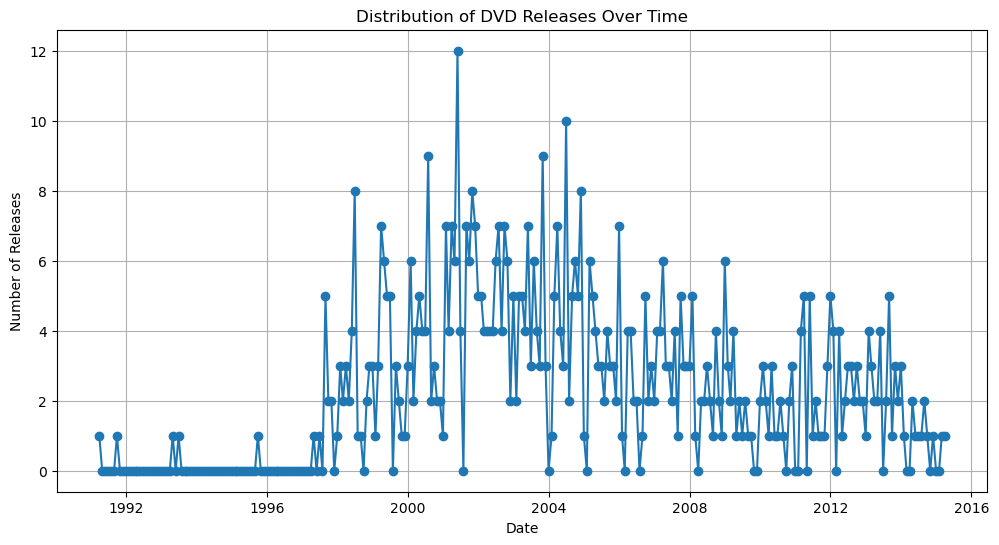

In [9]:
# Drop rows where the date is missing (optional)
df = df.dropna(subset=['dvd_release_date'])

# Group by month and count the number of DVD releases
df_grouped = df.resample('M', on='dvd_release_date').size()

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.plot(df_grouped.index, df_grouped.values, marker='o')
plt.title('Distribution of DVD Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


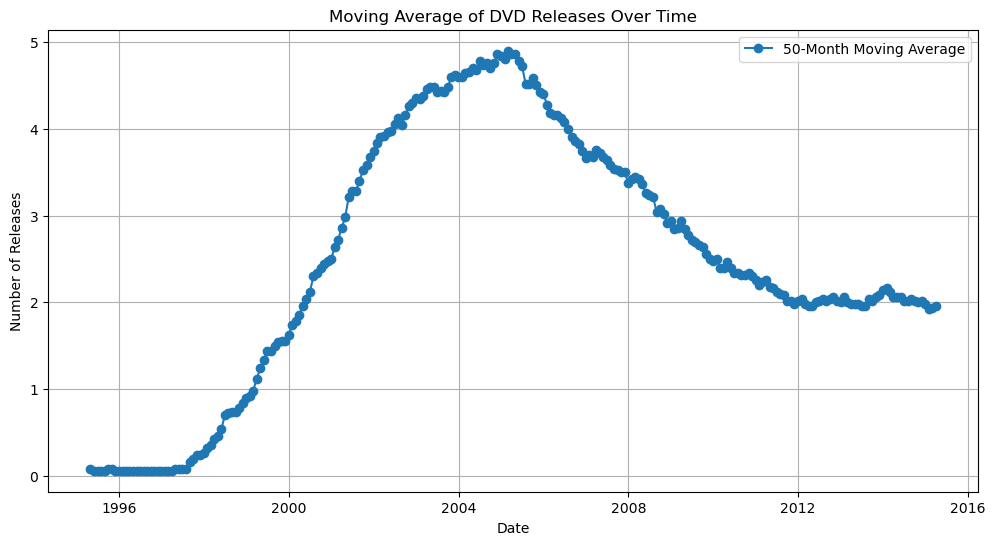

In [10]:
# Calculate the moving average (e.g., 6-month window)
moving_avg = df_grouped.rolling(window=50).mean()
# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(moving_avg.index, moving_avg.values, marker='o', label='50-Month Moving Average')
plt.title('Moving Average of DVD Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend()
plt.show()

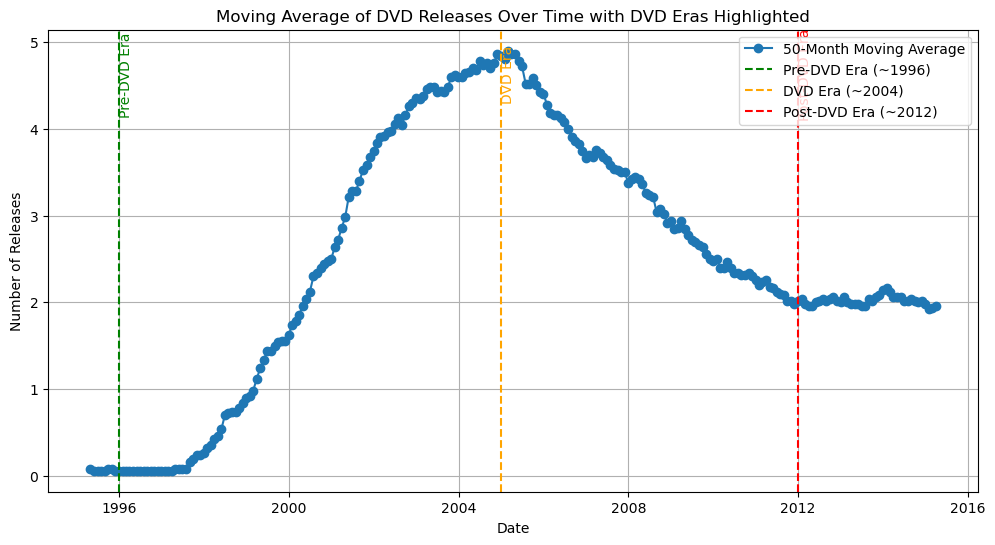

In [11]:
# Plot the moving average
plt.figure(figsize=(12, 6))
plt.plot(moving_avg.index, moving_avg.values, marker='o', label='50-Month Moving Average')

# Add vertical lines for different eras
plt.axvline(pd.Timestamp('1996-01-01'), color='green', linestyle='--', label='Pre-DVD Era (~1996)')
plt.axvline(pd.Timestamp('2005-01-01'), color='orange', linestyle='--', label='DVD Era (~2004)')
plt.axvline(pd.Timestamp('2012-01-01'), color='red', linestyle='--', label='Post-DVD Era (~2012)')

# Add text annotations
plt.text(pd.Timestamp('1996-01-01'), plt.ylim()[1] * 0.9, 'Pre-DVD Era', color='green', rotation=90, va='center')
plt.text(pd.Timestamp('2005-01-01'), plt.ylim()[1] * 0.9, 'DVD Era', color='orange', rotation=90, va='center')
plt.text(pd.Timestamp('2012-01-01'), plt.ylim()[1] * 0.9, 'Post-DVD Era', color='red', rotation=90, va='center')

# Add labels and legend
plt.title('Moving Average of DVD Releases Over Time with DVD Eras Highlighted')
plt.xlabel('Date')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.legend()
plt.show()


/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldc

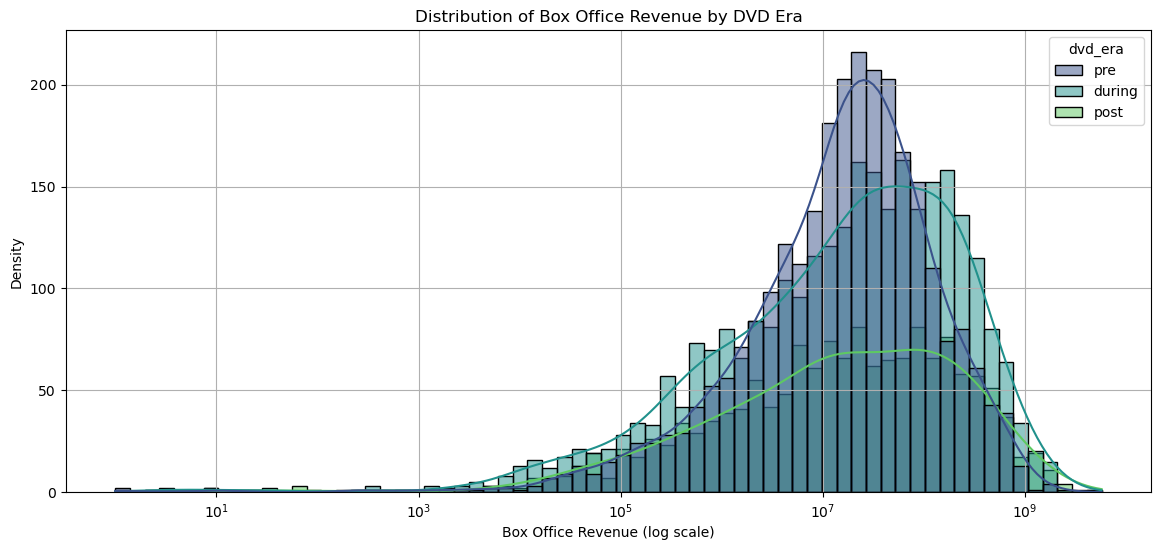


Summary statistics for pre DVD era:
count    2.728000e+03
mean     6.668486e+07
std      1.422847e+08
min      1.000000e+00
25%      4.558000e+06
50%      1.946512e+07
75%      5.952072e+07
max      1.834791e+09
Name: revenue, dtype: float64

Summary statistics for during DVD era:
count    2.909000e+03
mean     1.117877e+08
std      2.392093e+08
min      1.000000e+00
25%      2.575055e+06
50%      2.290000e+07
75%      1.147639e+08
max      4.449535e+09
Name: revenue, dtype: float64

Summary statistics for post DVD era:
count    1.518000e+03
mean     1.295785e+08
std      3.155301e+08
min      2.000000e+00
25%      2.206908e+06
50%      1.819403e+07
75%      1.112282e+08
max      5.705981e+09
Name: revenue, dtype: float64


In [12]:
# Convert 'release_date' to datetime format if not already in that format
df_combined['release_date'] = pd.to_datetime(df_combined['release_date'], errors='coerce')

# Ensure 'revenue' is numeric
df_combined['revenue'] = pd.to_numeric(df_combined['revenue'], errors='coerce')

# Filter out movies with missing or zero revenue data
df_combined_filtered = df_combined[df_combined['revenue'] > 0]

# Plot revenue distributions for each DVD era
plt.figure(figsize=(14, 6))
sns.histplot(data=df_combined_filtered, x='revenue', hue='dvd_era', kde=True, log_scale=True, palette='viridis')
plt.title('Distribution of Box Office Revenue by DVD Era')
plt.xlabel('Box Office Revenue (log scale)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Summary statistics for each DVD era
for era in ['pre', 'during', 'post']:
    print(f"\nSummary statistics for {era} DVD era:")
    print(df_combined_filtered[df_combined_filtered['dvd_era'] == era]['revenue'].describe())


/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/ravotyann/anaconda3/lib/python3.11/site-packages/seaborn/_oldc

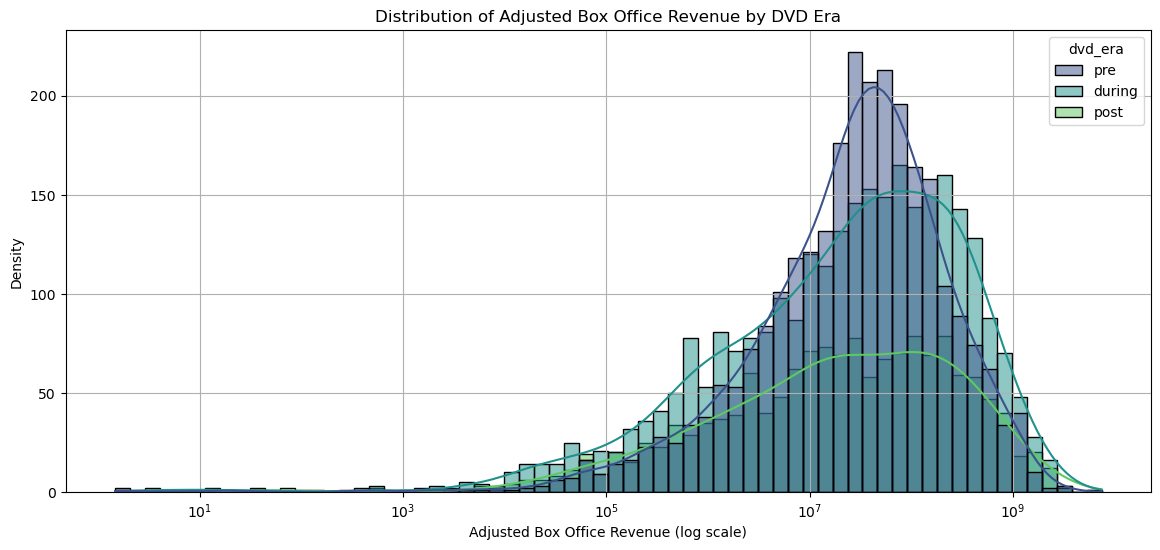


Summary statistics for pre DVD era:
count    2.728000e+03
mean     1.128711e+08
std      2.368835e+08
min      1.680000e+00
25%      7.747162e+06
50%      3.250594e+07
75%      1.013247e+08
max      2.972362e+09
Name: adjusted_revenue, dtype: float64

Summary statistics for during DVD era:
count    2.909000e+03
mean     1.597521e+08
std      3.432058e+08
min      1.480000e+00
25%      3.656684e+06
50%      3.249794e+07
75%      1.622843e+08
max      6.852283e+09
Name: adjusted_revenue, dtype: float64

Summary statistics for post DVD era:
count    1.518000e+03
mean     1.661193e+08
std      4.044910e+08
min      2.560000e+00
25%      2.807240e+06
50%      2.345102e+07
75%      1.423791e+08
max      7.417776e+09
Name: adjusted_revenue, dtype: float64


In [23]:
# Import necessary libraries
from datetime import datetime

# Example inflation adjustment factor (replace with actual data)
# This is a dictionary where keys are years, and values are adjustment factors
# Example: {2000: 1.5, 2001: 1.4, ..., 2024: 1.0}
inflation_factors = {
    year: 1.0 + 0.02 * (2024 - year)  # Placeholder: assumes 2% inflation per year
    for year in range(1900, 2025)
}

# Ensure 'release_year' is extracted and numeric
df_combined['release_year'] = df_combined['release_date'].dt.year

# Adjust revenue for inflation
df_combined['adjusted_revenue'] = df_combined.apply(
    lambda row: row['revenue'] * inflation_factors.get(row['release_year'], 1.0),
    axis=1
)

# Ensure adjusted revenue is numeric
df_combined['adjusted_revenue'] = pd.to_numeric(df_combined['adjusted_revenue'], errors='coerce')

# Filter out movies with missing or zero adjusted revenue data
df_combined_filtered = df_combined[df_combined['adjusted_revenue'] > 0]

# Plot adjusted revenue distributions for each DVD era
plt.figure(figsize=(14, 6))
sns.histplot(
    data=df_combined_filtered,
    x='adjusted_revenue',
    hue='dvd_era',
    kde=True,
    log_scale=True,
    palette='viridis'
)
plt.title('Distribution of Adjusted Box Office Revenue by DVD Era')
plt.xlabel('Adjusted Box Office Revenue (log scale)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Summary statistics for each DVD era (adjusted revenue)
for era in ['pre', 'during', 'post']:
    print(f"\nSummary statistics for {era} DVD era:")
    print(df_combined_filtered[df_combined_filtered['dvd_era'] == era]['adjusted_revenue'].describe())


In [13]:
#Peak DVD era has the most success in terms of Revenue
#--> Due to the success of DVD rentals (Sales)
#The peak DVD era had more consistent mid-to-high revenue movies compared to the post-DVD era, where revenue distribution became more uneven.

In [14]:
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols

# 1. Data Cleaning and Preparation
# Filter out movies with zero or missing revenue and ensure valid release years
df_cleaned = df_combined_filtered[
    (df_combined_filtered['revenue'] > 0) & (df_combined_filtered['release_year'] > 1900)
].copy()

# Log-transform revenue for better distribution
df_cleaned['log_revenue'] = np.log(df_cleaned['revenue'])

# Ensure enough representation across DVD eras
era_counts = df_cleaned['dvd_era'].value_counts()
print("Movies per era before filtering:", era_counts)

# Balance data by limiting each era to the smallest category size
min_count = era_counts.min()
df_balanced = df_cleaned.groupby('dvd_era').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

print("Movies per era after balancing:", df_balanced['dvd_era'].value_counts())

# 2. Statistical Tests

# Linear Regression: Log-Revenue vs Release Year
X = sm.add_constant(df_balanced['release_year'])  # Add constant for intercept
y = df_balanced['log_revenue']
linear_model = sm.OLS(y, X).fit()

# ANOVA for Revenue Variability Explained by Release Year
anova_model = ols('log_revenue ~ release_year', data=df_balanced).fit()
anova_table_year = sm.stats.anova_lm(anova_model, typ=2)

# Chi-Square Test: Revenue Distribution by DVD Era
# Create revenue bins for chi-square test
df_balanced['revenue_bin'] = pd.qcut(df_balanced['revenue'], q=5, labels=False)
contingency_table = pd.crosstab(df_balanced['revenue_bin'], df_balanced['dvd_era'])
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)

# ANOVA for Revenue Differences Between DVD Eras
anova_era_model = ols('log_revenue ~ dvd_era', data=df_balanced).fit()
anova_table_era = sm.stats.anova_lm(anova_era_model, typ=2)

# Display Results
results = {
    "Linear Regression Summary (Year -> Revenue)": linear_model.summary(),
    "ANOVA Table (Year -> Revenue Variability)": anova_table_year,
    "Chi-Square Test (Revenue Distribution by Era)": {
        "Chi2 Statistic": chi2,
        "p-value": p_chi2,
        "Degrees of Freedom": dof,
    },
    "ANOVA Table (Revenue by DVD Era)": anova_table_era,
}

results

Movies per era before filtering: dvd_era
during    2909
pre       2728
post      1518
Name: count, dtype: int64
Movies per era after balancing: dvd_era
during    1518
post      1518
pre       1518
Name: count, dtype: int64


/var/folders/qb/qcqtgmn507n9lry48pqshj0r0000gp/T/ipykernel_10473/81722349.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_cleaned.groupby('dvd_era').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


{'Linear Regression Summary (Year -> Revenue)': <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:            log_revenue   R-squared:                       0.000
 Model:                            OLS   Adj. R-squared:                 -0.000
 Method:                 Least Squares   F-statistic:                    0.2674
 Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.605
 Time:                        16:29:35   Log-Likelihood:                -10898.
 No. Observations:                4554   AIC:                         2.180e+04
 Df Residuals:                    4552   BIC:                         2.181e+04
 Df Model:                           1                                         
 Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
 --------------------

In [19]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency

# Clean the dataset
df_cleaned = df_combined_filtered[
    (df_combined_filtered['revenue'] > 0) & 
    (df_combined_filtered['budget'] > 0)
].copy()

# Calculate profitability
df_cleaned['profitability'] = df_cleaned['revenue'] - df_cleaned['budget']

# Log-transform revenue and profitability
df_cleaned['log_revenue'] = np.log(df_cleaned['revenue'])
df_cleaned['log_profitability'] = np.log(df_cleaned['profitability'].clip(lower=1))  # Avoid log(0)

# Ensure balanced representation across DVD eras
era_counts = df_cleaned['dvd_era'].value_counts()
min_count = era_counts.min()
df_balanced = df_cleaned.groupby('dvd_era').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)

# T-Test: Revenue Differences Between Eras
era_pairs = [('pre', 'during'), ('during', 'post'), ('pre', 'post')]
t_test_results_revenue = {}
for era1, era2 in era_pairs:
    group1 = df_balanced[df_balanced['dvd_era'] == era1]['log_revenue']
    group2 = df_balanced[df_balanced['dvd_era'] == era2]['log_revenue']
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    t_test_results_revenue[f"{era1} vs {era2}"] = {"t-statistic": t_stat, "p-value": p_val}

# Chi-Square Test: Revenue Distribution by Era
df_balanced['revenue_bin'] = pd.qcut(df_balanced['revenue'], q=5, labels=False)
contingency_table_revenue = pd.crosstab(df_balanced['revenue_bin'], df_balanced['dvd_era'])
chi2_revenue, p_chi2_revenue, dof_revenue, expected_revenue = chi2_contingency(contingency_table_revenue)

# T-Test: Profitability Differences Between Eras
t_test_results_profitability = {}
for era1, era2 in era_pairs:
    group1 = df_balanced[df_balanced['dvd_era'] == era1]['log_profitability']
    group2 = df_balanced[df_balanced['dvd_era'] == era2]['log_profitability']
    t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
    t_test_results_profitability[f"{era1} vs {era2}"] = {"t-statistic": t_stat, "p-value": p_val}

# Chi-Square Test: Profitability Distribution by Era
df_balanced['profitability_bin'] = pd.qcut(df_balanced['profitability'], q=5, labels=False)
contingency_table_profitability = pd.crosstab(df_balanced['profitability_bin'], df_balanced['dvd_era'])
chi2_profitability, p_chi2_profitability, dof_profitability, expected_profitability = chi2_contingency(contingency_table_profitability)

# Compile Results
results = {
    "T-Test Results (Revenue)": t_test_results_revenue,
    "Chi-Square Test (Revenue Distribution)": {
        "Chi2 Statistic": chi2_revenue,
        "p-value": p_chi2_revenue,
        "Degrees of Freedom": dof_revenue,
    },
    "T-Test Results (Profitability)": t_test_results_profitability,
    "Chi-Square Test (Profitability Distribution)": {
        "Chi2 Statistic": chi2_profitability,
        "p-value": p_chi2_profitability,
        "Degrees of Freedom": dof_profitability,
    }
}

results


/var/folders/qb/qcqtgmn507n9lry48pqshj0r0000gp/T/ipykernel_10473/2167311834.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_cleaned.groupby('dvd_era').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


{'T-Test Results (Revenue)': {'pre vs during': {'t-statistic': 0.9280894068075858,
   'p-value': 0.35348227265351206},
  'during vs post': {'t-statistic': -0.3574453387498385,
   'p-value': 0.7207945782162758},
  'pre vs post': {'t-statistic': 0.5220824565288635,
   'p-value': 0.6016747763530685}},
 'Chi-Square Test (Revenue Distribution)': {'Chi2 Statistic': 91.83732057416267,
  'p-value': 1.9690857435063686e-16,
  'Degrees of Freedom': 8},
 'T-Test Results (Profitability)': {'pre vs during': {'t-statistic': 1.631682740662468,
   'p-value': 0.10289808735058371},
  'during vs post': {'t-statistic': -0.4501900470068099,
   'p-value': 0.6526201484191051},
  'pre vs post': {'t-statistic': 1.162908780194812,
   'p-value': 0.24500026522683477}},
 'Chi-Square Test (Profitability Distribution)': {'Chi2 Statistic': 47.63636363636364,
  'p-value': 1.1593655157356713e-07,
  'Degrees of Freedom': 8}}

In [16]:
#Revenue
#The mean revenues do not differ significantly across the eras, but revenue distributions do. This indicates structural changes in how revenues were distributed (e.g., fewer high-revenue movies in one era vs another).
#Profitability
#The mean profitability is consistent across eras, but the distribution differs. This might reflect changes in budget allocation or the cost-to-revenue ratio over time.

In [21]:
# Define a threshold for high revenue (e.g., top 10% of revenue)
threshold = df_combined_filtered['revenue'].quantile(0.90)

# Create a new column for high-revenue movies
df_combined_filtered['high_revenue'] = df_combined_filtered['revenue'] > threshold

# Check the updated DataFrame
print(df_combined_filtered[['title', 'revenue', 'high_revenue']].head())


                          title   revenue  high_revenue
4                       Henry V  20337800         False
6                      Baby Boy  58763298         False
12               Daddy and Them      6718         False
13       The Gods Must Be Crazy  94331783         False
14  Kinjite: Forbidden Subjects   6833692         False


/var/folders/qb/qcqtgmn507n9lry48pqshj0r0000gp/T/ipykernel_10473/1725143458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_filtered['high_revenue'] = df_combined_filtered['revenue'] > threshold


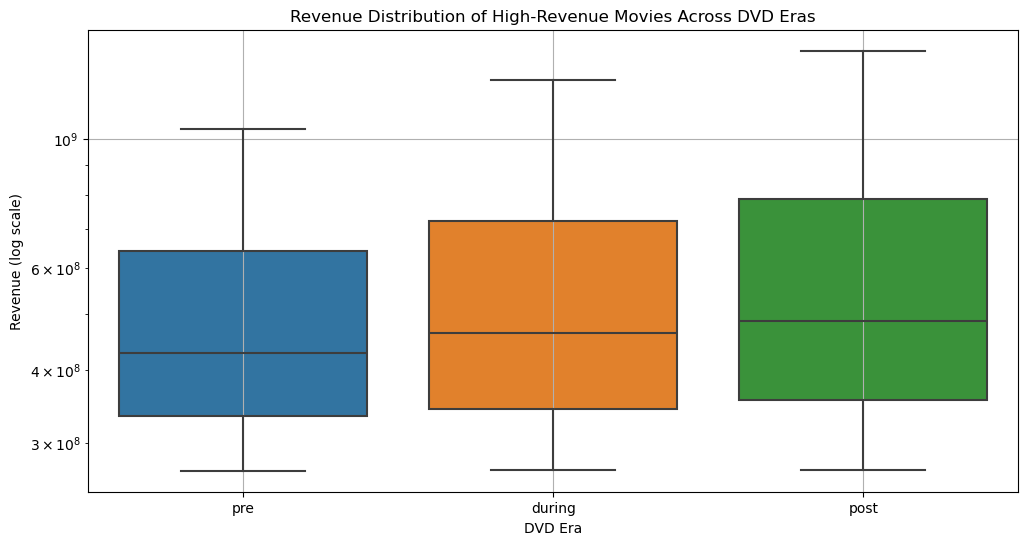

Spearman Correlation (DVD Era -> Revenue): 0.11 (p-value: 0.0040)

Regression Analysis Summary (Revenue ~ DVD Era):
                            OLS Regression Results                            
Dep. Variable:        np.log(revenue)   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     6.796
Date:                Thu, 19 Dec 2024   Prob (F-statistic):            0.00119
Time:                        16:40:44   Log-Likelihood:                -538.32
No. Observations:                 716   AIC:                             1083.
Df Residuals:                     713   BIC:                             1096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------

/var/folders/qb/qcqtgmn507n9lry48pqshj0r0000gp/T/ipykernel_10473/2115313065.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_high_revenue['dvd_era_encoded'] = df_high_revenue['dvd_era'].map(era_mapping)


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import spearmanr

# Filter high-revenue movies
df_high_revenue = df_combined_filtered[df_combined_filtered['high_revenue']]

# 1. Revenue Distribution Across DVD Eras
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_high_revenue, x='dvd_era', y='revenue', showfliers=False)
plt.title('Revenue Distribution of High-Revenue Movies Across DVD Eras')
plt.yscale('log')
plt.xlabel('DVD Era')
plt.ylabel('Revenue (log scale)')
plt.grid(True)
plt.show()

# 2. Correlation Analysis
# Encode 'dvd_era' as numerical values for correlation
era_mapping = {'pre': 0, 'during': 1, 'post': 2}
df_high_revenue['dvd_era_encoded'] = df_high_revenue['dvd_era'].map(era_mapping)

spearman_corr, p_spearman = spearmanr(df_high_revenue['dvd_era_encoded'], df_high_revenue['revenue'])
print(f"Spearman Correlation (DVD Era -> Revenue): {spearman_corr:.2f} (p-value: {p_spearman:.4f})")

# 3. Regression Analysis
# Perform regression to assess the influence of DVD era on revenue
model = ols('np.log(revenue) ~ C(dvd_era)', data=df_high_revenue).fit()
print("\nRegression Analysis Summary (Revenue ~ DVD Era):")
print(model.summary())


In [ ]:
#Weak positive correlation between dvd_era and revenue (r=0.11r=0.11).Statistically significant (p=0.004p=0.004), indicating a slight increase in revenue trends over time from the pre-DVD to the post-DVD era.
#Practical significance is limited due to the small correlation magnitude.
#Regression Analysis:
#The dvd_era was used as a categorical predictor for log-transformed revenue.
#Results:
#Pre-DVD Era:
#Average revenue was 10% lower than during the DVD peak era (p=0.029p=0.029).
#Post-DVD Era:
#Average revenue was 9.5% higher than during the DVD peak era (p=0.046p=0.046).
#Model Fit:
#R-squared: 0.019 (1.9% of revenue variability explained by dvd_era).
#Indicates that DVD era has a statistically significant but weak influence on revenue variability.

In [ ]:
#Insights and Observations

#Peak During the DVD Era:
#Revenues were highest during the DVD era, reinforcing the importance of physical media during its peak years for driving revenues.
#The post-DVD era showed a recovery in revenues, potentially linked to alternative revenue streams such as streaming and digital sales.
#Pre-DVD Era Lag:
#Revenues were significantly lower in the pre-DVD era compared to the DVD peak, likely due to the lack of supplementary revenue streams like rentals and home media sales.
#Limited Practical Significance:
#Although the regression results and correlation were statistically significant, their practical significance was weak (low R-squared and small effect sizes), suggesting that DVD eras alone do not explain revenue trends for high-revenue movies.

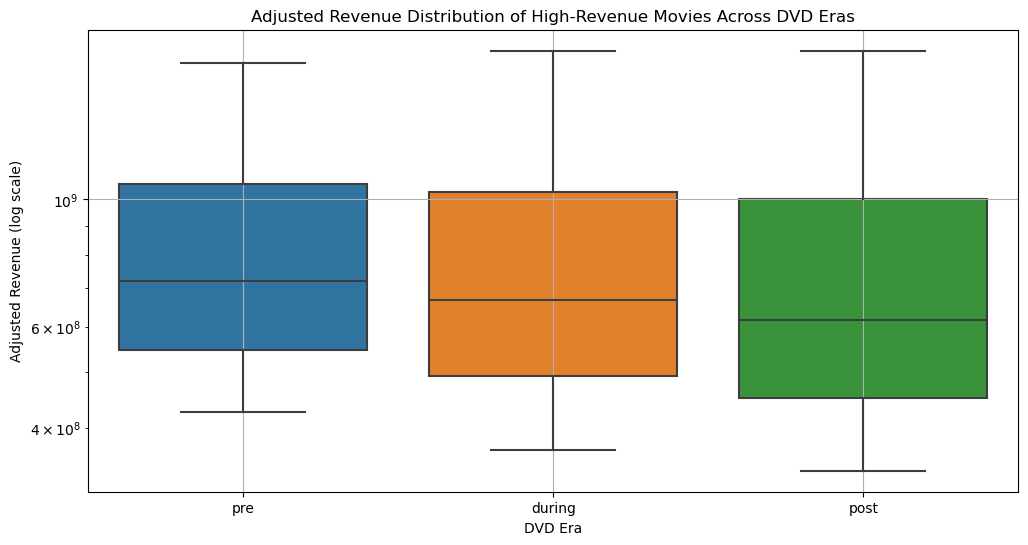

Spearman Correlation (DVD Era -> Adjusted Revenue): -0.10 (p-value: 0.0083)

Regression Analysis Summary (Adjusted Revenue ~ DVD Era):
                               OLS Regression Results                               
Dep. Variable:     np.log(adjusted_revenue)   R-squared:                       0.002
Model:                                  OLS   Adj. R-squared:                 -0.001
Method:                       Least Squares   F-statistic:                    0.8121
Date:                      Thu, 19 Dec 2024   Prob (F-statistic):              0.444
Time:                              17:40:45   Log-Likelihood:                -538.37
No. Observations:                       716   AIC:                             1083.
Df Residuals:                           713   BIC:                             1096.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
               

In [25]:
from datetime import datetime

# Generate inflation adjustment factors
# Assuming 2% inflation rate per year, relative to the base year (2024 in this case)
inflation_factors = {
    year: 1.0 + 0.02 * (2024 - year) for year in range(1900, 2025)
}

# Ensure 'release_year' is extracted and numeric
df_high_revenue['release_year'] = pd.to_numeric(df_high_revenue['release_year'], errors='coerce')

# Adjust revenue for inflation
df_high_revenue['adjusted_revenue'] = df_high_revenue.apply(
    lambda row: row['revenue'] * inflation_factors.get(row['release_year'], 1.0), axis=1
)

# 1. Revenue Distribution Across DVD Eras (Inflation-Adjusted)
plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_high_revenue, x='dvd_era', y='adjusted_revenue', showfliers=False
)
plt.yscale('log')
plt.title('Adjusted Revenue Distribution of High-Revenue Movies Across DVD Eras')
plt.xlabel('DVD Era')
plt.ylabel('Adjusted Revenue (log scale)')
plt.grid(True)
plt.show()

# 2. Correlation Analysis (Adjusted for Inflation)
era_mapping = {'pre': 0, 'during': 1, 'post': 2}
df_high_revenue['dvd_era_encoded'] = df_high_revenue['dvd_era'].map(era_mapping)

spearman_corr, p_spearman = spearmanr(
    df_high_revenue['dvd_era_encoded'], df_high_revenue['adjusted_revenue']
)
print(f"Spearman Correlation (DVD Era -> Adjusted Revenue): {spearman_corr:.2f} (p-value: {p_spearman:.4f})")

# 3. Regression Analysis (Adjusted for Inflation)
model = ols("np.log(adjusted_revenue) ~ C(dvd_era)", data=df_high_revenue).fit()
print("\nRegression Analysis Summary (Adjusted Revenue ~ DVD Era):")
print(model.summary())


